**All information is from [TOMMY SHELBY](https://www.kaggle.com/azminetoushikwasi) and his [amazing notebook](https://www.kaggle.com/azminetoushikwasi)**

# K-Means Clustering
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition **n** observations into **k** clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

k-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.

**Where is K-means clustering used?**
k-means algorithm is very popular and used in a variety of applications such as market segmentation, document clustering, image segmentation and image compression, etc. The goal usually when we undergo a cluster analysis is either: Get a meaningful intuition of the structure of the data we're dealing with.

**Advantages of k-means**
* Relatively simple to implement
* Scales to large data sets.
* Guarantees convergence.
* Can warm-start the positions of centroids.
* Easily adapts to new examples.
* Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

**Disadvantages of k-means**
* Choosing K manually.
    * Use the “Loss vs. Clusters” plot to find the optimal (k), as discussed in Interpret Results.
* Being dependent on initial values.
    * For a low , you can mitigate this dependence by running k-means several times with different initial values and picking the best result. As increases, you need advanced versions of k-means to pick better values of the initial centroids (called k-means seeding). For a full discussion of k- means seeding see, A Comparative Study of Efficient Initialization Methods for the K-Means Clustering Algorithm by M. Emre Celebi, Hassan A. Kingravi, Patricio A. Vela.
* Clustering data of varying sizes and density.
    * k-means has trouble clustering data where clusters are of varying sizes and density. To cluster such data, you need to generalize k-means as described in the Advantages section.
* Clustering outliers.
    * Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.
* Scaling with number of dimensions.
    * As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. Reduce dimensionality either by using PCA on the feature data, or by using “spectral clustering” to modify the clustering algorithm as explained below.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

In [61]:
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

In [62]:
training_data.shape

(1000, 2)

In [64]:
kmeans_model = KMeans(n_clusters=2)  # define the model
kmeans_result = kmeans_model.fit_predict(training_data)  # assign each data point to a cluster
kmeans_clusters = np.unique(kmeans_result)  # get all of the unique clusters

In [65]:
kmeans_result.shape

(1000,)

In [66]:
kmeans_clusters.shape

(2,)

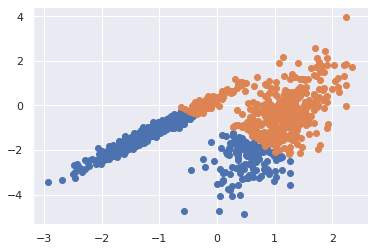

In [67]:
for dbscan_cluster in kmeans_clusters:
    index = np.where(kmeans_result == dbscan_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
    
plt.show()

# DBSCAN Clustering
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density. It groups 'densely grouped' data points into a single cluster.

**Is DBSCAN faster than KMeans?**
DBSCAN produces a varying number of clusters, based on the input data. Here's a list of advantages of KMeans and DBScan: KMeans is much faster than DBScan. DBScan doesn't need number of clusters.

**What is the basic principle of DBSCAN clustering?**
The principle of DBSCAN is to find the neighborhoods of data points exceeds certain density threshold. The density threshold is defined by two parameters: the radius of the neighborhood (eps) and the minimum number of neighbors/data points (minPts) within the radius of the neighborhood.

**What is the difference between KMeans and DBSCAN?**
K-means needs a prototype-based concept of a cluster. DBSCAN needs a density-based concept. K-means has difficulty with non-globular clusters and clusters of multiple sizes. DBSCAN is used to handle clusters of multiple sizes and structures and is not powerfully influenced by noise or outliers.

**Advantages of DBSCAN clustering**
* Can easily deal with noise, not affected by outliers.
* Doesn’t require prior specification of clusters.
* It has no strict shapes, it can correctly accommodate many data points.

**Disadvantages of DBSCAN clustering**
* Sensitive to the clustering hyper-parameters – the eps and the min_points.
* Cannot work with datasets of varying densities.
* Fails if the data is too sparse.
* The density measures (Reachability and Connectivity) can be affected by sampling

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

In [69]:
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

In [70]:
training_data.shape

(1000, 2)

In [81]:
dbscan_model = DBSCAN(eps=0.25, min_samples=9)  # define the model
dbscan_result = dbscan_model.fit_predict(training_data)  # assign each data point to a cluster
dbscan_clusters = np.unique(dbscan_result)  # get all of the unique clusters

In [82]:
dbscan_result.shape

(1000,)

In [83]:
dbscan_clusters.shape

(5,)

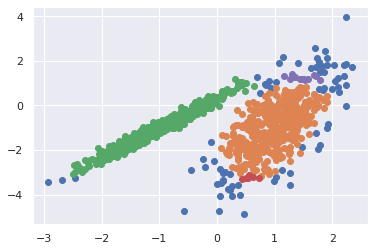

In [85]:
# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    index = np.where(dbscan_result == dbscan_cluster)# get data points that fall in this cluster
    plt.scatter(training_data[index, 0], training_data[index, 1]) # make the plot

plt.show()

# Gaussian Mixture Model algorithm
Gaussian mixture models (GMMs) are often used for data clustering. You can use GMMs to perform either hard clustering or soft clustering on query data. To perform hard clustering, the GMM assigns query data points to the multivariate normal components that maximize the component posterior probability, given the data.

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

At its simplest, GMM is also a type of clustering algorithm. As its name implies, each cluster is modelled according to a different Gaussian distribution. This flexible and probabilistic approach to modelling the data means that rather than having hard assignments into clusters like k-means, we have soft assignments.

**Advantages of Gaussian Mixture Model algorithm**
* The associativity of a data point to a cluster is quantified using probability metrics – which can be easily interpreted.
* Proven to be accurate for real-time data sets.
* Some versions of GMM allows for mixed membership of data points, hence it can be a good alternative to Fuzzy C Means to achieve fuzzy clustering.

**Disadvantages of Gaussian Mixture Model algorithm**
* Complex algorithm and cannot be applicable to larger data
* It is hard to find clusters if the data is not Gaussian, hence a lot of data preparation is required.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

In [87]:
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

In [88]:
training_data.shape

(1000, 2)

In [94]:
gaussian_model = GaussianMixture(n_components=2)  # define the model
gaussian_model.fit(training_data)  # train the model
gaussian_result = gaussian_model.predict(training_data)  # assign each data point to a cluster
gaussian_clusters = np.unique(gaussian_result)  # get all of the unique clusters

In [95]:
gaussian_result.shape

(1000,)

In [96]:
gaussian_clusters.shape

(2,)

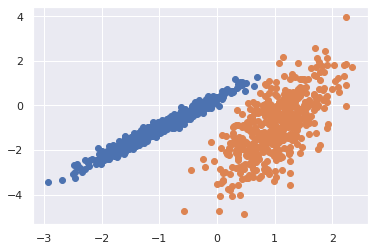

In [98]:
# plot Gaussian Mixture the clusters
for gaussian_cluster in gaussian_clusters:
    index = np.where(gaussian_result == gaussian_cluster)  # get data points that fall in this cluster
    plt.scatter(training_data[index, 0], training_data[index, 1])  # make the plot

plt.show()

# BIRCH algorithm
The Balance Iterative Reducing and Clustering using Hierarchies (BIRCH) algorithm works better on large data sets than the k-means algorithm. It breaks the data into little summaries that are clustered instead of the original data points. The summaries hold as much distribution information about the data points as possible.

This algorithm is commonly used with other clustering algorithm because the other clustering techniques can be used on the summaries generated by BIRCH. The main downside of the BIRCH algorithm is that it only works on numeric data values. You can't use this for categorical values unless you do some data transformations.

**Advantages of BIRCH algorithm**
* Finds a good clustering with a single scan and improves the quality with a few additional scans

**Disadvantages of BIRCH algorithm**
* Handles only numeric data

**Applications of BIRCH algorithm**
* Pixel classification in images
* Image compression
* Works with very large data sets

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

In [108]:
# Generating 600 samples using make_blobs
dataset, clusters = make_blobs(n_samples = 600, centers = 8, cluster_std = 0.75, random_state = 0)

In [109]:
dataset.shape

(600, 2)

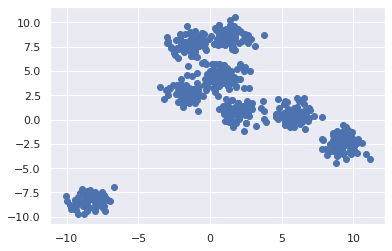

In [115]:
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

In [112]:
print(np.unique(clusters))
clusters

[0 1 2 3 4 5 6 7]


array([7, 1, 7, 0, 1, 1, 3, 3, 2, 3, 3, 1, 5, 1, 7, 2, 5, 7, 5, 2, 1, 6,
       3, 4, 5, 0, 4, 0, 0, 4, 5, 5, 5, 2, 1, 1, 7, 5, 4, 5, 4, 0, 2, 0,
       0, 0, 0, 0, 7, 4, 5, 4, 5, 6, 4, 5, 4, 3, 2, 1, 4, 2, 1, 3, 0, 6,
       7, 2, 2, 4, 2, 6, 3, 0, 0, 4, 6, 6, 3, 3, 2, 6, 6, 5, 0, 7, 5, 3,
       3, 6, 4, 1, 0, 1, 3, 2, 3, 3, 0, 7, 2, 5, 1, 6, 3, 1, 2, 1, 3, 7,
       0, 3, 0, 3, 1, 4, 1, 7, 7, 5, 2, 0, 7, 2, 1, 2, 6, 2, 6, 0, 2, 2,
       7, 5, 3, 0, 2, 0, 4, 4, 3, 2, 6, 3, 3, 5, 0, 4, 4, 0, 2, 5, 1, 5,
       6, 4, 1, 6, 3, 7, 4, 2, 4, 5, 4, 1, 1, 6, 6, 5, 5, 1, 7, 1, 5, 7,
       4, 4, 0, 5, 7, 2, 7, 6, 4, 3, 5, 0, 5, 2, 7, 4, 7, 1, 2, 6, 3, 2,
       4, 6, 7, 4, 2, 0, 7, 6, 0, 0, 4, 2, 4, 1, 5, 4, 7, 5, 0, 2, 1, 4,
       7, 0, 6, 0, 0, 4, 7, 2, 6, 1, 4, 6, 6, 3, 4, 2, 2, 5, 4, 7, 1, 1,
       1, 7, 2, 1, 1, 1, 4, 4, 2, 6, 5, 0, 6, 4, 3, 5, 4, 0, 7, 1, 7, 4,
       3, 3, 1, 6, 4, 7, 0, 3, 2, 7, 7, 3, 4, 3, 3, 6, 6, 5, 7, 6, 6, 0,
       5, 1, 5, 3, 4, 7, 4, 7, 5, 6, 7, 6, 6, 2, 2,

In [113]:
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)  # creating the BIRCH clustering model
model.fit(dataset)  # fit the data (Training)
pred = model.predict(dataset)  # predict the same data

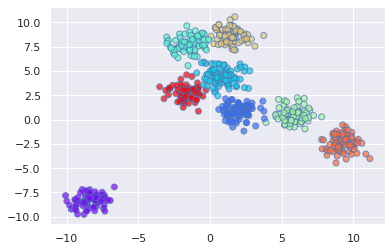

In [116]:
# Creating a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

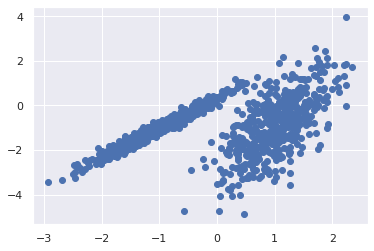

In [117]:
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)
plt.scatter(training_data[:, 0], training_data[:, 1])
plt.show()

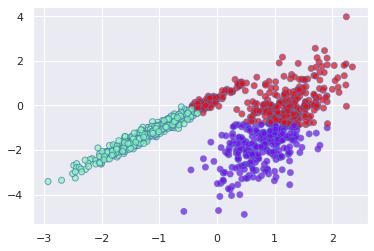

In [128]:
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)  # creating the BIRCH clustering model
model.fit(training_data)  # fit the data (Training)
pred = model.predict(training_data)  # predict the same data
plt.scatter(training_data[:, 0], training_data[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

# Affinity Propagation clustering
Affinity propagation (AP) is a graph based clustering algorithm similar to k Means or K medoids, which does not require the estimation of the number of clusters before running the algorithm. Affinity propagation finds “exemplars” i.e. members of the input set that are representative of clusters.

Each data point communicates with all of the other data points to let each other know how similar they are and that starts to reveal the clusters in the data. You don't have to tell this algorithm how many clusters to expect in the initialization parameters.

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

In [8]:
# initialize the data set we'll work with
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

In [149]:
model = AffinityPropagation(damping=0.7)  # define the model
model.fit(training_data)  # train the model
result = model.predict(training_data)  # assign each data point to a cluster
clusters = np.unique(result) # get all of the unique clusters

In [150]:
clusters.shape

(25,)

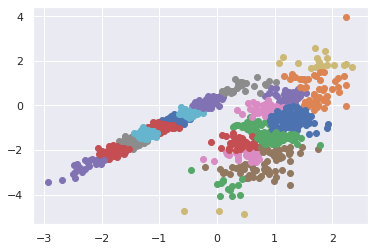

In [152]:
for cluster in clusters:
    index = np.where(result == cluster)  # get data points that fall in this cluster
    plt.scatter(training_data[index, 0], training_data[index, 1])  # make the plot

# show the plot
plt.show()

# Mean-Shift clustering 
Mean shift is a non-parametric feature-space mathematical analysis technique for locating the maxima of a density function, a so-called mode-seeking algorithm. Application domains include cluster analysis in computer vision and image processing.

It is a density-based clustering algorithm where it firstly, seeks for stationary points in the density function. Then next, the clusters are eventually shifted to a region with higher density by shifting the center of the cluster to the mean of the points present in the current window. The shift if the window is repeated until no more points can be accommodated inside of that window.

**Advantages of Mean-Shift clustering**
* It does not need to make any model assumption as like in K-means or Gaussian mixture.
* It can also model the complex clusters which have nonconvex shape.
* It only needs one parameter named bandwidth which automatically determines the number of clusters.
* There is no issue of local minima as like in K-means.
* No problem generated from outliers.

**Disadvantages of Mean-Shift clustering**
* Mean-shift algorithm does not work well in case of high dimension, where number of clusters changes abruptly.
* We do not have any direct control on the number of clusters but in some applications, we need a specific number of clusters.
* It cannot differentiate between meaningful and meaningless modes.

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift

In [7]:
# initialize the data set we'll work with
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

In [159]:
mean_model = MeanShift()  # define the model
mean_result = mean_model.fit_predict(training_data)  # assign each data point to a cluster
mean_clusters = np.unique(mean_result)  # get all of the unique clusters
mean_clusters.shape

(3,)

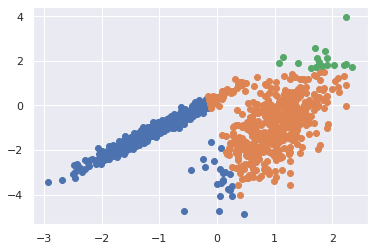

In [161]:
for mean_cluster in mean_clusters:
    index = np.where(mean_result == mean_cluster)  # get data points that fall in this cluster
    plt.scatter(training_data[index, 0], training_data[index, 1])  # make the plot

# show the Mean-Shift plot
plt.show()

# OPTICS algorithm
OPTICS Clustering stands for Ordering Points To Identify Cluster Structure. It draws inspiration from the DBSCAN clustering algorithm. It adds two more terms to the concepts of DBSCAN clustering.

They are:
* Core Distance: It is the minimum value of radius required to classify a given point as a core point. If the given point is not a Core point, then it’s Core Distance is undefined.
* Reachability Distance: It is defined with respect to another data point q(Let). The Reachability distance between a point p and q is the maximum of the Core Distance of p and the Euclidean Distance(or some other distance metric) between p and q. Note that The Reachability Distance is not defined if q is not a Core point.

**OPTICS Clustering v/s DBSCAN Clustering:**
* Memory Cost : The OPTICS clustering technique requires more memory as it maintains a priority queue (Min Heap) to determine the next data point which is closest to the point currently being processed in terms of Reachability Distance. It also requires more computational power because the nearest neighbour queries are more complicated than radius queries in DBSCAN.
* Fewer Parameters : The OPTICS clustering technique does not need to maintain the epsilon parameter and is only given in the above pseudo-code to reduce the time taken. This leads to the reduction of the analytical process of parameter tuning. This technique does not segregate the given data into clusters. It merely produces a Reachability distance plot and it is upon the interpretation of the programmer to cluster the points accordingly.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS

In [6]:
# initialize the data set we'll work with
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

In [183]:
optics_model = OPTICS(eps=0.75, min_samples=10)  # define the model
optics_result = optics_model.fit_predict(training_data)  # assign each data point to a cluster
optics_clusters = np.unique(optics_result)  # get all of the unique clusters
optics_clusters.shape

(17,)

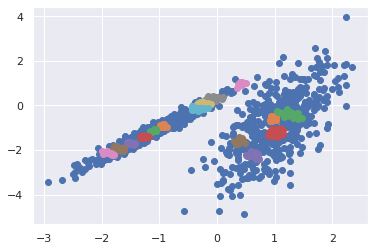

In [184]:
for optics_cluster in optics_clusters:
    index = np.where(optics_result == optics_cluster)  # get data points that fall in this cluster
    plt.scatter(training_data[index, 0], training_data[index, 1])  # make the plot

# show the OPTICS plot
plt.show()

# Agglomerative Hierarchy clustering
The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It's also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster.

**Advantages**
* No prior knowledge about the number of clusters is needed, although the user needs to define a threshold for divisions.
* Easy to implement across various forms of data and known to provide robust results for data generated via various sources. Hence it has a wide application area.

**Disadvantages**
* The cluster division (DIANA) or combination (AGNES) is really strict and once performed, it cannot be undone and re-assigned in subsequent iterations or re-runs.
* It has a high time complexity, in the order of O(n^2 log n) for all the n data-points, hence cannot be used for larger datasets.
* Cannot handle outliers and noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

In [2]:
# initialize the data set we'll work with
training_data, _ = make_classification(n_samples=1000, 
                                       n_features=2,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

In [3]:
agglomerative_model = AgglomerativeClustering(n_clusters=2)  # define the model
agglomerative_result = agglomerative_model.fit_predict(training_data)  # assign each data point to a cluster
agglomerative_clusters = np.unique(agglomerative_result)  # get all of the unique clusters

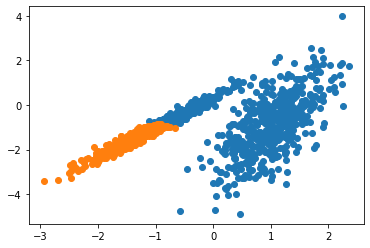

In [5]:
# plot the clusters
for agglomerative_cluster in agglomerative_clusters:
    index = np.where(agglomerative_result == agglomerative_cluster)  # get data points that fall in this cluster
    plt.scatter(training_data[index, 0], training_data[index, 1])  # make the plot

# show the Agglomerative Hierarchy plot
plt.show()

# Fuzzy Analysis Clustering
Fuzzy c-means (FCM) is a data clustering technique in which a data set is grouped into N clusters with every data point in the dataset belonging to every cluster to a certain degree. For example, a data point that lies close to the center of a cluster will have a high degree of membership in that cluster, and another data point that lies far away from the center of a cluster will have a low degree of membership to that cluster.

The fcm function performs FCM clustering. It starts with a random initial guess for the cluster centers; that is the mean location of each cluster. Next, fcm assigns every data point a random membership grade for each cluster. By iteratively updating the cluster centers and the membership grades for each data point, fcm moves the cluster centers to the correct location within a data set and, for each data point, finds the degree of membership in each cluster. This iteration minimizes an objective function that represents the distance from any given data point to a cluster center weighted by the membership of that data point in the cluster.

This algorithm follows the fuzzy cluster assignment methodology of clustering. The working of FCM Algorithm is almost similar to the k-means – distance-based cluster assignment – however, the major difference is, as mentioned earlier, that according to this algorithm, a data point can be put into more than one cluster.

**Advantages**
* FCM works best for highly correlated and overlapped data, where k-means cannot give any conclusive results.
* It is an unsupervised algorithm and it has a higher rate of convergence than other partitioning based algorithms.

**Disadvantages**
* We need to specify the number of clusters “k” prior to the start of the algorithm
* Although convergence is always guaranteed but the process is very slow and this cannot be used for larger data.
* Prone to errors if the data has noise and outliers.

In [26]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

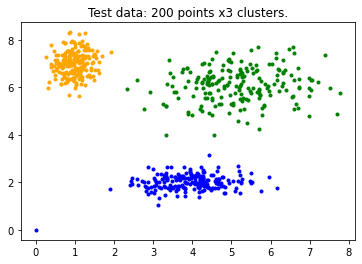

In [28]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')
plt.show()

| Clustering Method                              | Description                                                                                                           | Advantages                                                                                                                                                                | Disadvantages                                                                                                                                          | Algorithms                                       |
| ---------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------ |
| Hierarchical Clustering                        | Based on top-to-bottom hierarchy of the data points to create clusters.                                               | Easy to implement, the number of clusters need not be specified apriori, dendrograms are easy to interpret.                                                               | Cluster assignment is strict and cannot be undone, high time complexity, cannot work for a larger dataset                                              | DIANA, AGNES, hclust etc.                        |
| Partitioning methods                           | Based on centroids and data points are assigned into a cluster based on its proximity to the cluster centroid         | Easy to implement, faster processing, can work on larger data, easy to interpret the outputs                                                                              | We need to specify the number of cenrtroids apriori, clusters that get created are of inconsistent sizes and densities, Effected by noise and outliers | k-means, k-medians, k-modes                      |
| Distribution-based Clustering                  | Based on the probability distribution of the data, clusters are derived from various metrics like mean, variance etc. | Number of clusters need not be specified apriori, works on real-time data, metrics are easy to understand and tune                                                        | Complex algorithm and slow, cannot be scaled to larger data                                                                                            | Gaussian Mixed Models, DBCLASD                   |
| Density-based Clustering (Model-based methods) | Based on density of the data points, also known as model based clustering                                             | Can handle noise and outliers, need not specify number of clusters in the start, clusters that are created are highly homogenous, no restrictions on cluster shapes.      | Complex algorithm and slow, cannot be scaled to larger data                                                                                            | DENCAST, DBSCAN                                  |
| Fuzzy Clustering                               | Based on Partitioning Approach but data points can belong to more than one cluster                                    | Can work on highly overlapped data, a higher rate of convergence                                                                                                          | We need to specify the number of centroids apriori, Effected by noise and outliers, Slow algorithm and cannot be scaled                                | Fuzzy C Means, Rough k means                     |
| Constraint Based (Supervised Clustering)       | Clustering is directed and controlled by user constraints                                                             | Creates a perfect decision boundary, can automatically determine the outcome classes based on constraints, future data can be classified based on the training boundaries | Overfitting, high level of misclassification errors, cannot be trained on larger datasets                                                              | Decision Trees, Random Forest, Gradient Boosting |